# ZTSI

Import necessary libraries and moduels

In [1]:
# import cv2
# import os
# import re
import numpy as np
import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from collections import Counter
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix, classification_report, accuracy_score
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.utils.class_weight import compute_class_weight
# from tensorflow.keras.utils import to_categorical
# from keras.regularizers import l2
# from functools import partial
# import keras.backend as K
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

Definition of every funtions used in project

In [2]:
dice5_dir =  'dice5balanced.csv'
dice5_count = 104000

In [3]:
def ReadDiceCSV(file_dir): 
    df = pd.read_csv(file_dir, header=None)

    # Pierwsza kolumna zawiera cyfry, reszta to piksele obrazu
    cyfry = df.iloc[:, 0]  # Pierwsza kolumna z cyframi
    piksele_obrazu = df.iloc[:, 1:]  # Reszta kolumn to piksele obrazu

    # Przekształć dane do postaci tablicy numpy
    cyfry_array = np.array(cyfry)
    piksele_array = np.array(piksele_obrazu)
    return (cyfry_array, piksele_array)

In [4]:
dice_y, dice_x = ReadDiceCSV(dice5_dir)
dice_x = dice_x.reshape((dice5_count, 100, -1))
print("dice:")
print(f"Label Shape: {dice_y.shape} has NAN: {np.isnan(dice_y).any()}")
print(f"Values : {np.unique(dice_y)}")
print(f"Data Shape: {dice_x.shape} has NAN: {np.isnan(dice_x).any()}")
print(f"Values : {np.unique(dice_x)}")


dice:
Label Shape: (104000,) has NAN: False
Values : [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30]
Data Shape: (104000, 100, 100) has NAN: False
Values : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199

{5: 4000, 6: 4000, 7: 4000, 8: 4000, 9: 4000, 10: 4000, 11: 4000, 12: 4000, 13: 4000, 14: 4000, 15: 4000, 16: 4000, 17: 4000, 18: 4000, 19: 4000, 20: 4000, 21: 4000, 22: 4000, 23: 4000, 24: 4000, 25: 4000, 26: 4000, 27: 4000, 28: 4000, 29: 4000, 30: 4000}


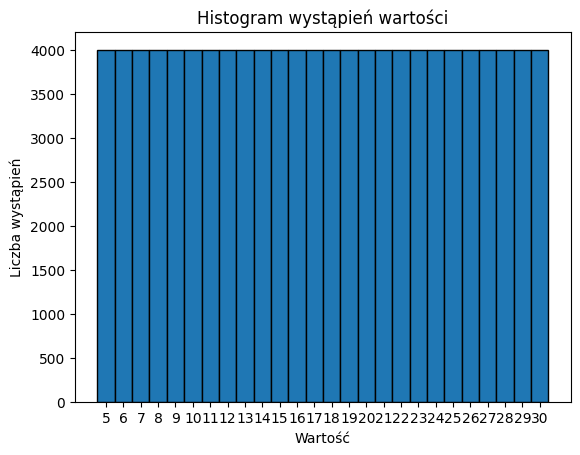

In [5]:
wartosci, liczba_wystapien = np.unique(dice_y, return_counts=True)

slownik_wystapien = dict(zip(wartosci, liczba_wystapien))

posortowany_slownik = dict(sorted(slownik_wystapien.items(), key=lambda x: x[1], reverse=True))

print(posortowany_slownik)

# Tworzenie histogramu
plt.hist(dice_y, bins=np.arange(min(dice_y), max(dice_y) + 2) - 0.5, edgecolor='black')

# Ustawienia wykresu
plt.title('Histogram wystąpień wartości')
plt.xlabel('Wartość')
plt.ylabel('Liczba wystąpień')
plt.xticks(np.arange(min(dice_y), max(dice_y) + 1))

# Wyświetlanie wykresu
plt.show()

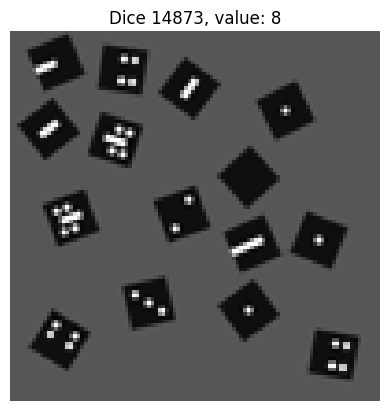

In [6]:
index_100000 = 118873 % dice5_count

image_dice = dice_x[index_100000]
plt.imshow(image_dice, cmap='gray')
plt.title(f'Dice {index_100000}, value: {dice_y[index_100000]}')
plt.axis('off')  # Wyłącz osie
plt.show()


torch.Size([100000, 100, 100])
Epoch [1/5], Loss: 3469.2740, Train Accuracy: 9.82%, Test Accuracy: 10.01%
Epoch [2/5], Loss: 3456.0321, Train Accuracy: 9.80%, Test Accuracy: 10.03%
Epoch [3/5], Loss: 3448.7848, Train Accuracy: 10.28%, Test Accuracy: 9.91%
Epoch [4/5], Loss: 3398.7570, Train Accuracy: 11.94%, Test Accuracy: 9.98%
Epoch [5/5], Loss: 3227.6976, Train Accuracy: 15.95%, Test Accuracy: 10.52%
Accuracy on test set: 10.52%
Misclassified Examples:
Example 1: True Label: 14, Predicted Label: 17


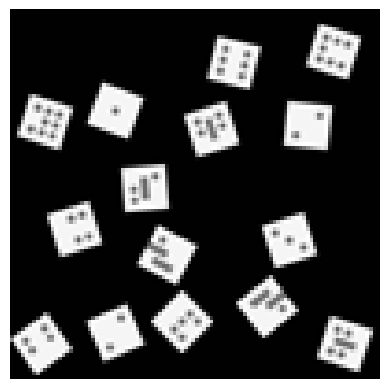

Example 2: True Label: 18, Predicted Label: 19


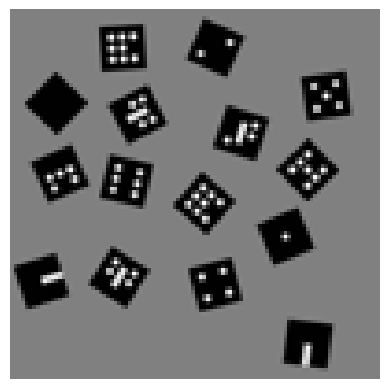

Example 3: True Label: 24, Predicted Label: 17


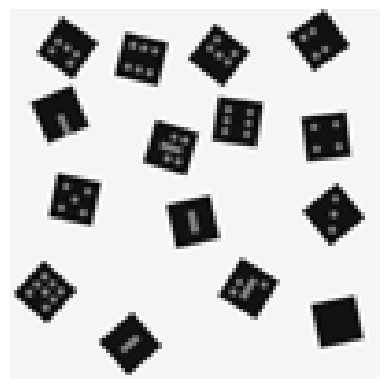

Example 4: True Label: 17, Predicted Label: 18


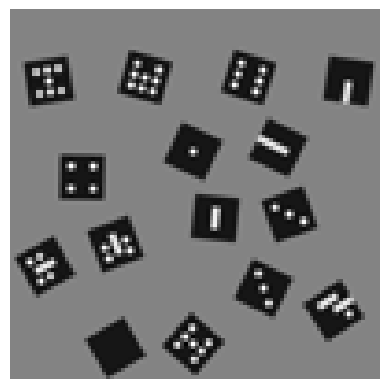

Example 5: True Label: 19, Predicted Label: 13


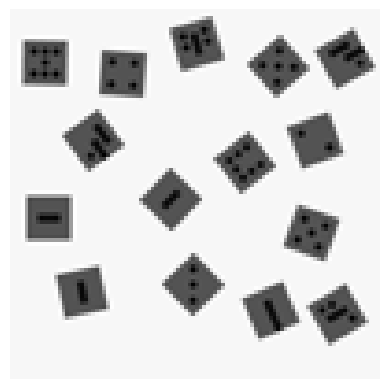

Example 6: True Label: 18, Predicted Label: 14


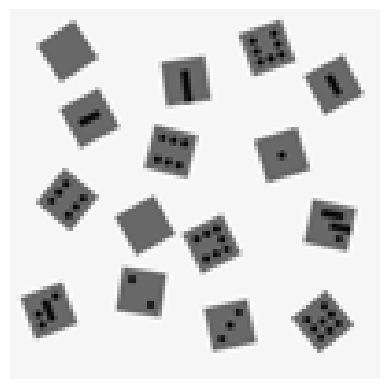

Example 7: True Label: 13, Predicted Label: 18


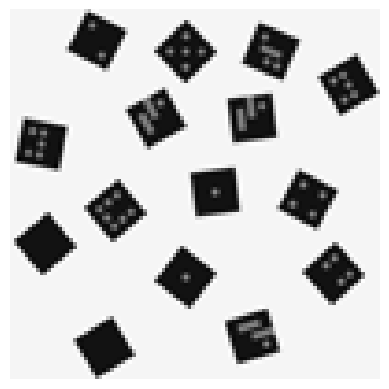

Example 8: True Label: 18, Predicted Label: 17


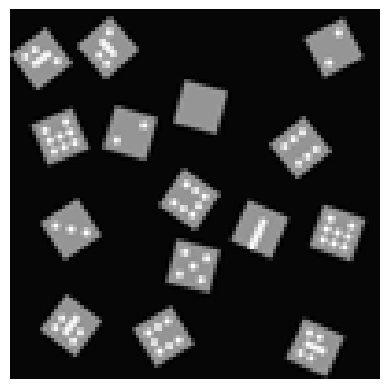

Example 9: True Label: 20, Predicted Label: 17


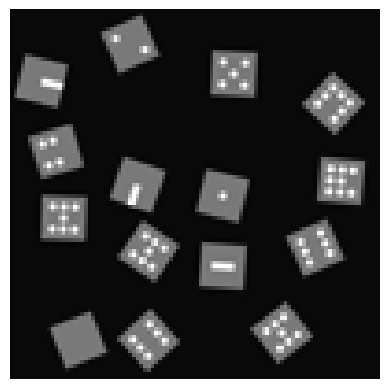

Example 10: True Label: 18, Predicted Label: 17


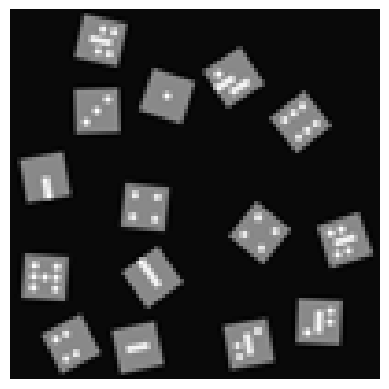

Example 11: True Label: 17, Predicted Label: 20


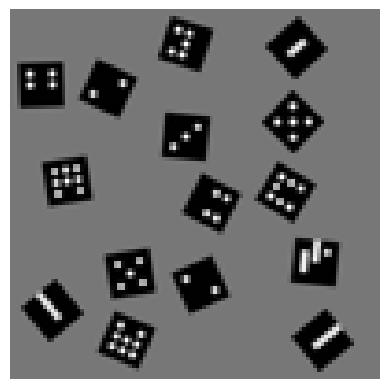

Example 12: True Label: 14, Predicted Label: 19


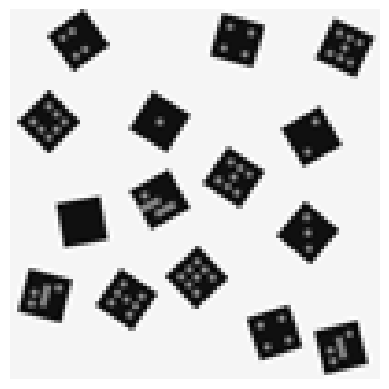

In [16]:
x_normalized = torch.tensor(dice_x / 255.0, dtype=torch.float32)
print(x_normalized.size())
y_tensor = torch.tensor(dice_y, dtype=torch.int64)

# Podziel dane na zbiory treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_tensor, test_size=0.2, random_state=42, stratify=y_tensor)
# Dodanie wymiaru dla kanałow obrazu
x_train = x_train.unsqueeze(1)
x_test = x_test.unsqueeze(1)
# Odjęcie 5 od etykiet, aby dane były z zakresu 0-25, nie wypływa to na model,
# trzeba pamiętać że po tej operacji wyniki nie odpowiadają wprost na rzeczywistą liczbą oczek
y_train = y_train -5
y_test =  y_test -5
# Twórz obiekty DataLoader dla danych treningowych i testowych
batch_size = 64
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Definiuj model sieci konwolucyjnej
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 25 * 25, 64)
        self.fc2 = nn.Linear(64, 26)  # Warstwa wyjściowa z 6 klasami

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 25 * 25)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicjalizuj model
model = CNN()

# Definiuj funkcję straty i optymizator
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Trenuj model
num_epochs = 5
for epoch in range(num_epochs):
    total_train_loss = 0.0
    total_train_correct = 0
    total_train_samples = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Zlicz błędne klasyfikacje na zbiorze treningowym
        _, predicted = torch.max(outputs.data, 1)
        total_train_correct += (predicted == labels).sum().item()
        total_train_samples += labels.size(0)
        
        total_train_loss += loss.item()
    
    # Oblicz dokładność trenowania
    train_accuracy = 100 * total_train_correct / total_train_samples

    # Ocena dokładności modelu na zbiorze testowym
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        test_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

# Ocena dokładności modelu na zbiorze testowym
with torch.no_grad():
    correct = 0
    total = 0
    misclassified_examples = []
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        misclassified_mask = predicted != labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        misclassified_examples.extend([(image, label, pred) for image, label, pred in zip(images[misclassified_mask], labels[misclassified_mask], predicted[misclassified_mask])])
    accuracy = 100 * correct / total
    print(f'Accuracy on test set: {accuracy:.2f}%')


print("Misclassified Examples:")
for idx, (image, label, prediction) in enumerate(misclassified_examples):
    print(f"Example {idx+1}: True Label: {label+5}, Predicted Label: {prediction+5}")
    plt.imshow(image[0], cmap='gray')
    plt.axis('off')  # Wyłącz osie
    plt.show()
    if idx > 10:
        break
    

In [10]:
labels1 = torch.zeros(len(dice_x), dtype=torch.long)  # Etykiety dla pierwszego zbioru danych
labels2 = torch.ones(len(mnist_x), dtype=torch.long)   # Etykiety dla drugiego zbioru danych
labels3 = torch.full((len(cifar_x),), 2, dtype=torch.long)  # Etykiety dla trzeciego zbioru danych

# Połącz zbiory danych w jeden
combined_data = torch.cat((torch.tensor(dice_x), torch.tensor(mnist_x), torch.tensor(cifar_x)), dim=0)

# Połącz etykiety w jeden tensor
combined_labels = torch.cat((labels1, labels2, labels3), dim=0)


print("combined:")
print(f"Label Shape: {combined_labels.shape} has NAN: {np.isnan(combined_labels).any()}")
print(f"Values : {np.unique(combined_labels)}")
print(f"Data Shape: {combined_data.shape} has NAN: {np.isnan(combined_data).any()}")
print(f"Values : {np.unique(combined_data)}")

combined:
Label Shape: torch.Size([170000]) has NAN: 0
Values : [0 1 2]
Data Shape: torch.Size([170000, 28, 28]) has NAN: 0
Values : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213

In [44]:
x_normalized = combined_data.clone().detach() / 255.0
print(x_normalized.size())
y_tensor = combined_labels.clone().detach().long()

# Podziel dane na zbiory treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_tensor, test_size=0.2, random_state=42, stratify=y_tensor)
# Dodanie wymiaru dla kanałow obrazu
x_train = x_train.unsqueeze(1)
x_test = x_test.unsqueeze(1)
# Twórz obiekty DataLoader dla danych treningowych i testowych
batch_size = 64
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Definiuj model sieci konwolucyjnej
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 3)  # Warstwa wyjściowa z 6 klasami

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicjalizuj model
model = CNN()

# Definiuj funkcję straty i optymizator
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Trenuj model
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Ocena dokładności modelu na zbiorze testowym
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy on test set: {accuracy:.2f}%')

torch.Size([170000, 28, 28])
Epoch [1/10], Loss: 0.0019
Epoch [2/10], Loss: 0.0044
Epoch [3/10], Loss: 0.0118
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0004
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0001
Epoch [10/10], Loss: 0.0000
Accuracy on test set: 99.97%


Label: 0, Count: 50000
Label: 1, Count: 50000
Label: 2, Count: 50000
combined:
Label Shape: torch.Size([150000]) has NAN: 0
Values : [0 1 2]
Data Shape: torch.Size([150000, 28, 28]) has NAN: 0
Values : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196

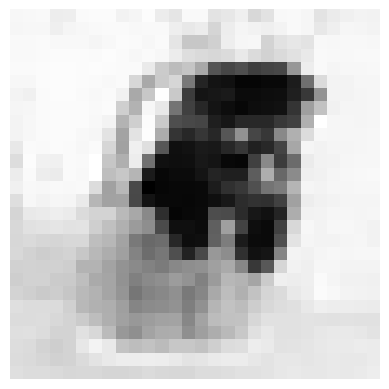

Example 2: True Label: 3, Predicted Label: 1


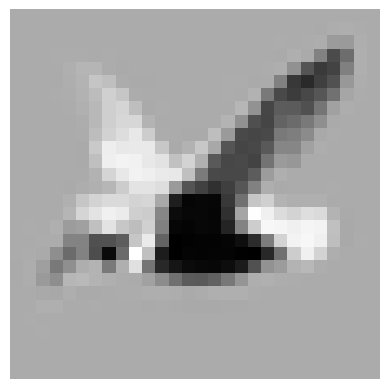

Example 3: True Label: 3, Predicted Label: 1


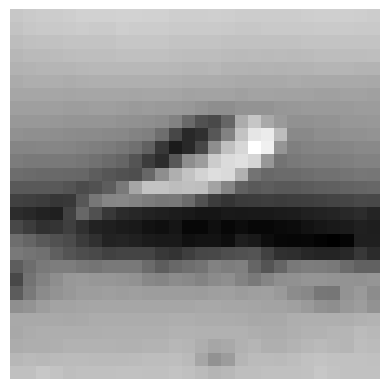

Example 4: True Label: 2, Predicted Label: 3


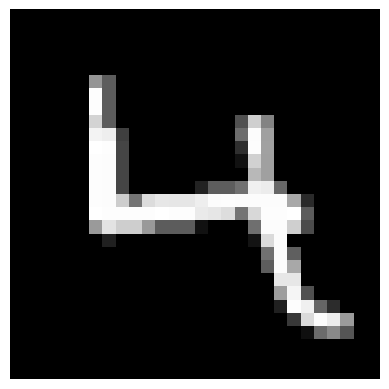

Example 5: True Label: 3, Predicted Label: 1


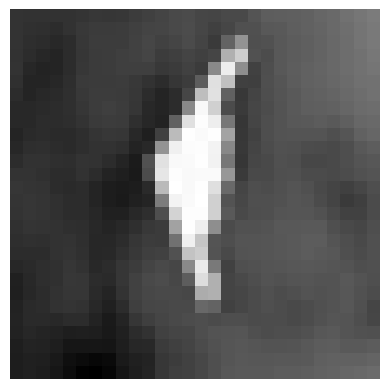

Example 6: True Label: 2, Predicted Label: 1


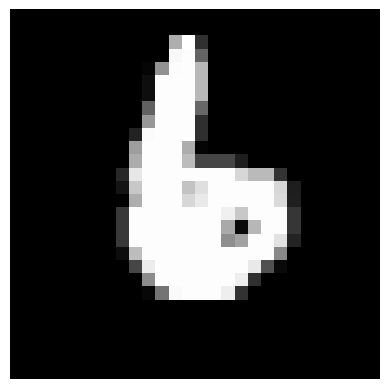

Example 7: True Label: 3, Predicted Label: 1


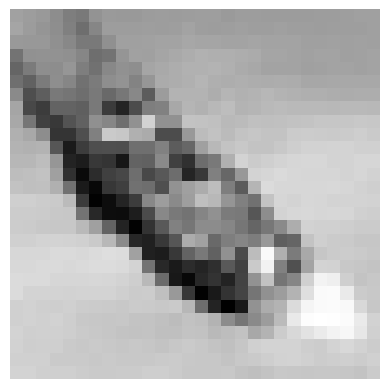

Example 8: True Label: 3, Predicted Label: 1


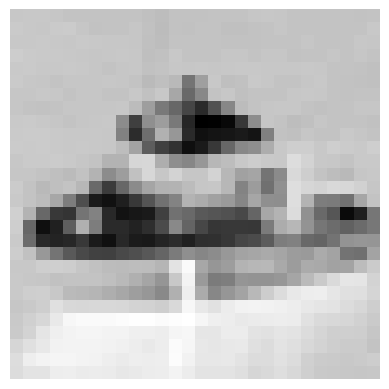

Example 9: True Label: 3, Predicted Label: 1


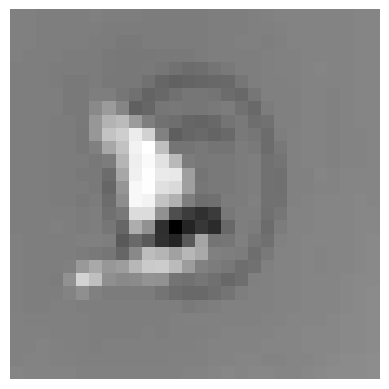

Example 10: True Label: 3, Predicted Label: 1


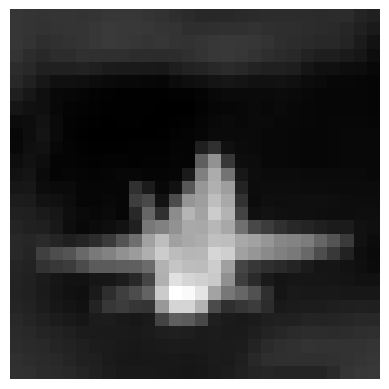

Example 11: True Label: 3, Predicted Label: 1


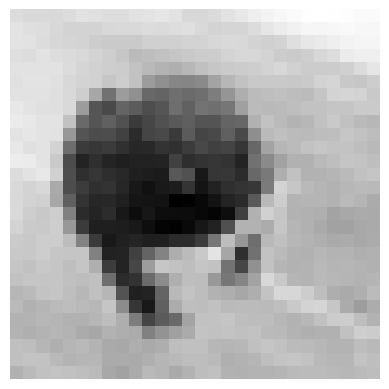

Example 12: True Label: 2, Predicted Label: 1


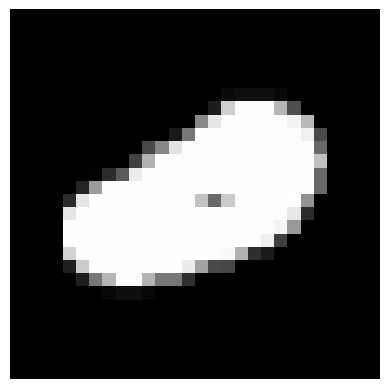

In [16]:
balanced_dice_x = dice_x[:int(len(dice_x) * 5/6)]  # Ogranicz do 5/6 oryginalnej długości tensora dice_x
balanced_mnist_x = mnist_x[:int(len(mnist_x) * 5/6)]

labels1 = torch.zeros(len(balanced_dice_x), dtype=torch.long)  # Etykiety dla pierwszego zbioru danych
labels2 = torch.ones(len(balanced_mnist_x), dtype=torch.long)   # Etykiety dla drugiego zbioru danych
labels3 = torch.full((len(cifar_x),), 2, dtype=torch.long)  # Etykiety dla trzeciego zbioru danych

# Połącz zbiory danych w jeden
combined_data = torch.cat((torch.tensor(balanced_dice_x), torch.tensor(balanced_mnist_x), torch.tensor(cifar_x)), dim=0)

# Połącz etykiety w jeden tensor
combined_labels = torch.cat((labels1, labels2, labels3), dim=0)

# Zliczanie wartości dla tensora combined_labels
unique_values, counts = np.unique(combined_labels.numpy(), return_counts=True)

# Wyświetlenie zliczeń
for value, count in zip(unique_values, counts):
    print(f"Label: {value}, Count: {count}")

print("combined:")
print(f"Label Shape: {combined_labels.shape} has NAN: {np.isnan(combined_labels).any()}")
print(f"Values : {np.unique(combined_labels)}")
print(f"Data Shape: {combined_data.shape} has NAN: {np.isnan(combined_data).any()}")
print(f"Values : {np.unique(combined_data)}")


x_normalized = combined_data.clone().detach() / 255.0
print(x_normalized.size())
y_tensor = combined_labels.clone().detach().long()

# Podziel dane na zbiory treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_tensor, test_size=0.2, random_state=42, stratify=y_tensor)
# Dodanie wymiaru dla kanałow obrazu
x_train = x_train.unsqueeze(1)
x_test = x_test.unsqueeze(1)
# Twórz obiekty DataLoader dla danych treningowych i testowych
batch_size = 64
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Definiuj model sieci konwolucyjnej
class CNN_2(nn.Module):
    def __init__(self):
        super(CNN_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        # self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 7 * 7, 16)
        self.fc2 = nn.Linear(16, 3)  # Warstwa wyjściowa z 6 klasami

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        # x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicjalizuj model
model = CNN_2()

# Definiuj funkcję straty i optymizator
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Trenuj model
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # Zlicz błędne klasyfikacje na zbiorze treningowym
        _, predicted = torch.max(outputs.data, 1)
        total_train_correct += (predicted == labels).sum().item()
        total_train_samples += labels.size(0)
        
        total_train_loss += loss.item()
    
    # Oblicz dokładność trenowania
    train_accuracy = 100 * total_train_correct / total_train_samples

    # Ocena dokładności modelu na zbiorze testowym
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        test_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

# Ocena dokładności modelu na zbiorze testowym
with torch.no_grad():
    correct = 0
    total = 0
    misclassified_examples = []
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        misclassified_mask = predicted != labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        misclassified_examples.extend([(image, label, pred) for image, label, pred in zip(images[misclassified_mask], labels[misclassified_mask], predicted[misclassified_mask])])
    accuracy = 100 * correct / total
    print(f'Accuracy on test set: {accuracy:.2f}%')


print("Misclassified Examples:")
for idx, (image, label, prediction) in enumerate(misclassified_examples):
    print(f"Example {idx+1}: True Label: {label+1}, Predicted Label: {prediction+1}")
    plt.imshow(image[0], cmap='gray')
    plt.axis('off')  # Wyłącz osie
    plt.show()
    if idx > 10:
        break